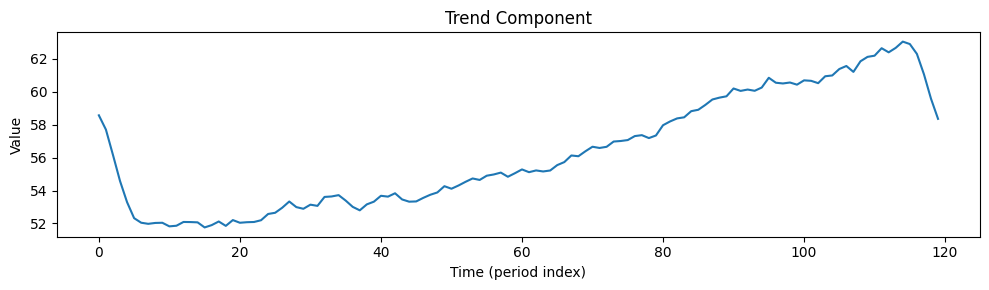

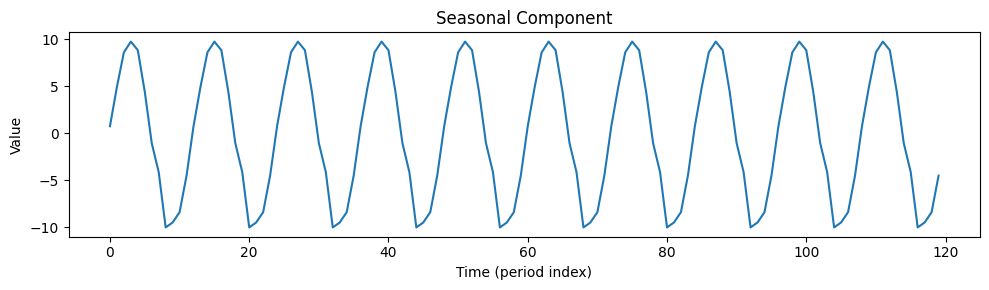

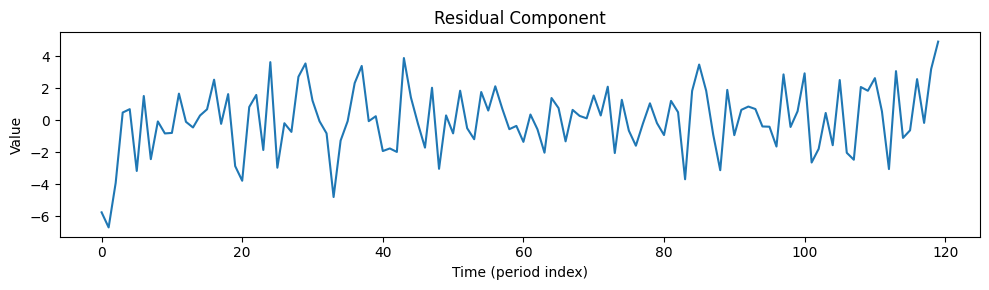

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Re-use or recreate the synthetic series (same code as before) -------
np.random.seed(0)
n_periods = 120        # 10 years of monthly data
t = np.arange(n_periods)
seasonal_component = 10 * np.sin(2 * np.pi * t / 12)
trend_component = 0.1 * t
noise_component = np.random.normal(scale=2, size=n_periods)
series = 50 + trend_component + seasonal_component + noise_component

# --- 2. Simple decomposition (moving‐average trend + seasonal pattern) ------
# Trend via 12-period centred moving average
s = pd.Series(series)
trend = s.rolling(window=12, center=True, min_periods=1).mean().values

# Seasonal pattern: average of detrended values at each month index
detrended = s - trend
month_index = t % 12
season_table = pd.DataFrame({"month": month_index, "detrended": detrended})
season_mean = season_table.groupby("month").mean()
seasonal = season_mean.loc[month_index].values.flatten()

# Residual
residual = series - trend - seasonal

# --- 3. Plot each component in a separate figure ---------------------------
for data, title in [(trend, "Trend Component"),
                    (seasonal, "Seasonal Component"),
                    (residual, "Residual Component")]:
    plt.figure(figsize=(10, 3))
    plt.plot(t, data)
    plt.title(title)
    plt.xlabel("Time (period index)")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()
